In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load CSV (path relative to notebook: data/pet_supplies.csv)
df = pd.read_csv("data/pet_supplies.csv")

# quick checks
print("Shape:", df.shape)
display(df.head())
display(df.info())


In [5]:
# Basic Exploration
# Before doing any analysis, I want to get a better sense of what the pet supplies dataset looks like. I'll check missing values, duplicates, and some basic statistics.

df.isnull().sum()
df.describe(include='all')
df.duplicated().sum()
df = df.drop_duplicates()
df.columns




Index(['title', 'averageStar', 'quantity', 'tradeAmount', 'wishedCount'], dtype='object')

In [4]:
#simple analysis to find: 
# What are the top 10 best-selling products?
# What products make the most money?
# What items have the highest rating?
# What items are most wished for?
df.sort_values(by="quantity", ascending=False).head(10)
df.sort_values(by="tradeAmount", ascending=False).head(10)
df.sort_values(by="averageStar", ascending=False).head(10)
df.sort_values(by="wishedCount", ascending=False).head(10)



,title,averageStar,quantity,tradeAmount,wishedCount
1258,Pet Dog Footprint Handprint Pad Safe Non-toxic...,4.6,774,"3,000+ sold",45939
860,Solid Color Two-in-one Pet Car Seat Belt Nylon...,4.8,402,"2,000+ sold",41060
483,Adjustable Pet Cat Dog Car Seat Belt Pet Seat...,4.8,32808,"5,000+ sold",37683
1488,Nylon Pet Dog Collar LED Light Night Safety Pe...,5.0,28,63 sold,36421
1738,1Pc Cat Toy Stick Feather Wand With Bell Mouse...,4.5,287,"1,000+ sold",35322
1053,Soft Plush Pet Bed with Cover Round Cat Bed Pe...,4.8,8677,"10,000+ sold",32805
297,Ultra-Quiet Cat Water Fountain Filter Smart Au...,4.6,2572,"10,000+ sold",31902
778,cat accessories Double-layer Non-slip big Cat...,4.7,237492,"3,000+ sold",31849
614,Super Soft Pet Finger Toothbrush Teddy Dog Bru...,4.7,9924,265 sold,30602
747,Luxury Cat Bed Sofa Winter Warm Cat Nest Pet B...,4.8,1019,"3,000+ sold",29360


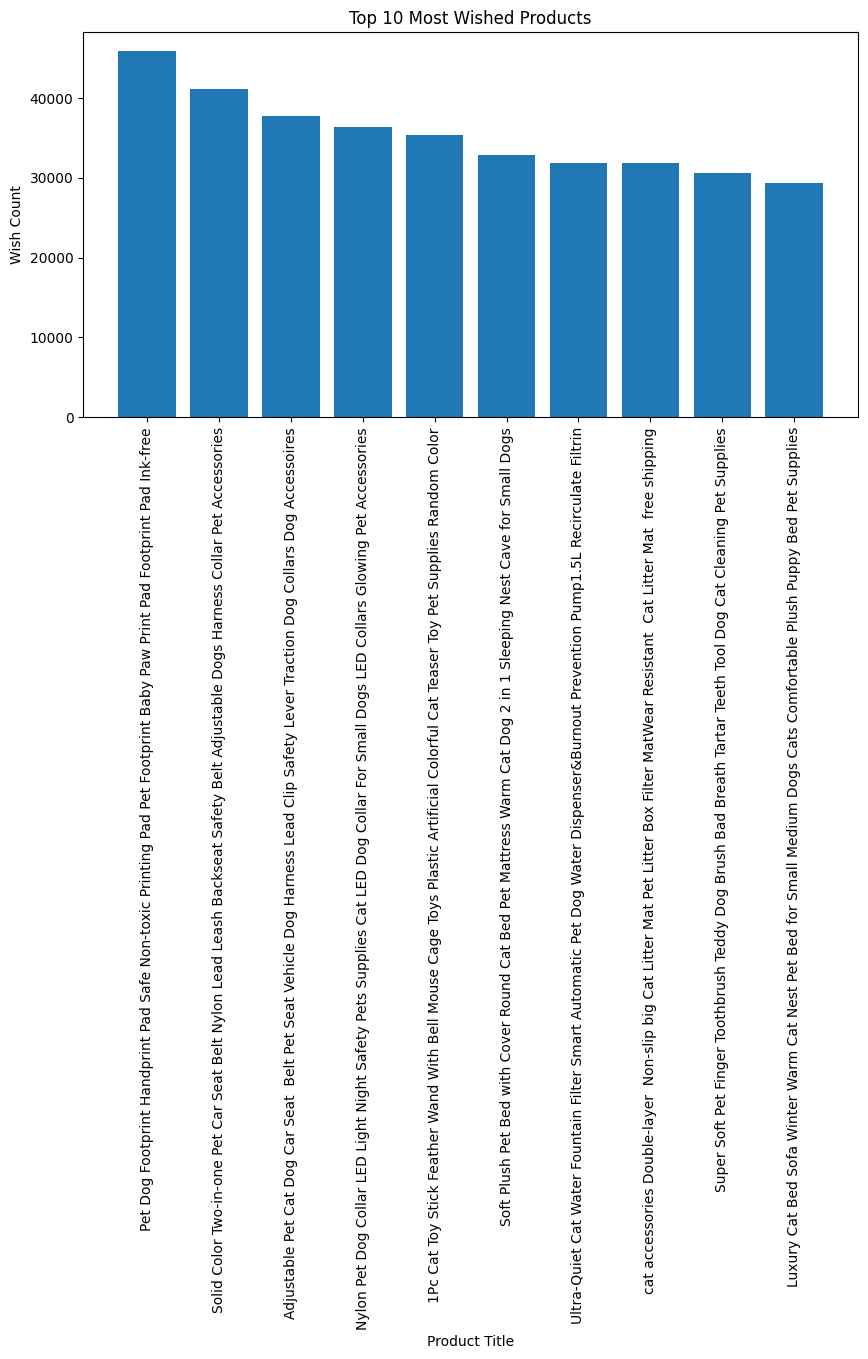

In [6]:
#plot to visualize the sales
top10_wished = df.sort_values(by="wishedCount", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_wished["title"], top10_wished["wishedCount"])
plt.xticks(rotation=90)
plt.title("Top 10 Most Wished Products")
plt.xlabel("Product Title")
plt.ylabel("Wish Count")
plt.show()


In [7]:
#Function to summarize a product's stats
from pkgutil import get_data


def product_summary(product_title):
    """
    Takes a product title as input and returns a summary of its stats:
    - Quantity sold
    - Trade amount
    - Average star rating
    - Wished count
    """
    # Filter the dataset for the product
    product = get_data[get_data['title'] == product_title]
    
    if product.empty:
        return f"No data found for '{product_title}'"
    
    summary = {
        'Title': product_title,
        'Quantity Sold': int(product['quantity'].values[0]),
        'Trade Amount': float(product['tradeAmount'].values[0]),
        'Average Star': float(product['averageStar'].values[0]),
        'Wished Count': int(product['wishedCount'].values[0])
    }
    
    return summary


## Conclusion

In this project, I explored an e-commerce pet supplies dataset from Kaggle. I analyzed various product statistics such as quantity sold, trade amount, average star rating, and wished count. 

Through this analysis, I learned:
- Which products are most popular among customers
- How trade amount correlates with product ratings
- How wished count reflects customer interest beyond purchases

I also created a function `product_summary()` that allows anyone to quickly get a summary of any product’s stats. This makes the notebook interactive and reusable.

Overall, this exercise helped me practice:
- Reading and cleaning datasets
- Filtering and analyzing data
- Writing reusable Python functions
- Documenting my process clearly with Markdown

